# Machine Learning Titanic dataset

You have 1 week to submit this assignment

This notebook covers the basic Machine Learning process in Python step-by-step. Go from raw data to at least 78% accuracy on the Titanic Survivors dataset. 

### Steps Covered


1. Importing  a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data
5. Split Training and Test Sets
6. Fine Tune Algorithms
7. Cross Validate with KFold

CSV to DataFrame
CSV files can be loaded into a dataframe by calling pd.read_csv . After loading the training and test files, print a sample to see what you're working with.

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import os 
import plotly.graph_objects as go
import plotly.express as px
#print sample 3 rows
df = pd.read_csv(r'C:\Users\Kevin\Downloads\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing Data

Visualizing data is crucial for recognizing underlying patterns to exploit in the model.

<Axes: xlabel='Embarked', ylabel='Survived'>

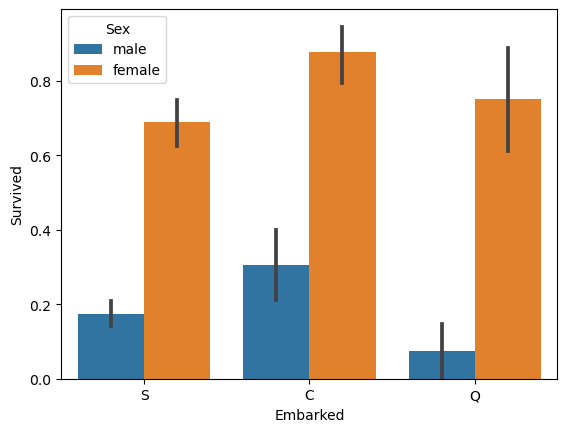

In [2]:
#make a barplot x-Embarked y-Survived depending on Sex
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df)


<Axes: xlabel='Pclass', ylabel='Survived'>

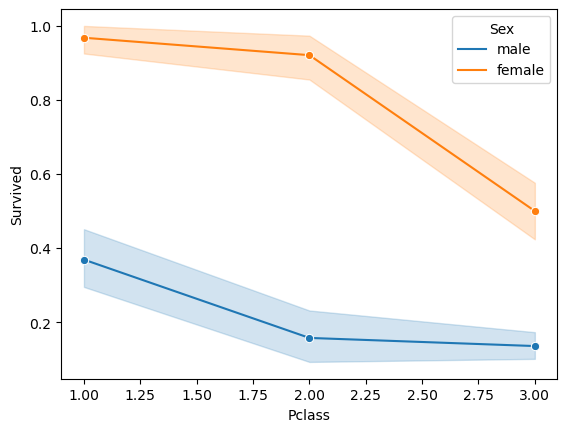

In [3]:
#make a linegraph x=Pclass, y-Survived depending on Sex
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df, marker='o')

## Transforming Features
1 Aside from 'Sex', the 'Age' feature is second in importance. To avoid overfitting, group people into logical human age groups.
2 Each Cabin starts with a letter. Delete the letter in Cabin column.
3 Fare is another continuous value that should be simplified. Make a data distribution for Fare, then place them into quartile bins accordingly.
4 Extract information from the 'Name' feature. Rather than use the full name, extracte the last name and name prefix (Mr. Mrs. Etc.), then appende them as their own features.
5 Lastly, drop useless features. (Ticket and Name)

In [4]:
age = df[['Name','Age', 'Sex']].copy()

<Axes: xlabel='Age group', ylabel='Survived'>

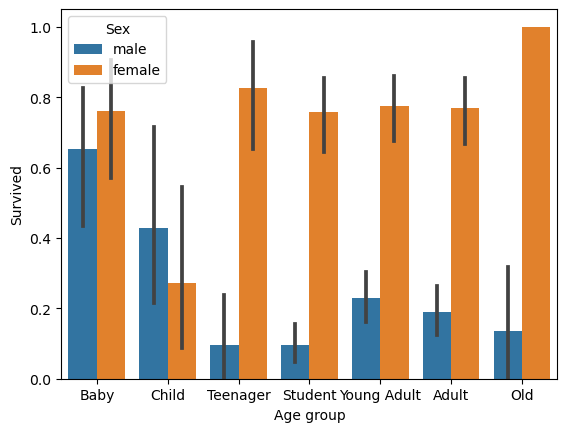

In [5]:
#make a barblot x-Age, y-Survived, depending on the Sex feature
bins=[0, 6, 13, 18, 25, 36, 60, 115]
labels=['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Old']
df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
sns.barplot(x='Age group', y='Survived', hue='Sex', data=df)

In [6]:
df['Cabin'] = df['Cabin'].str.upper().apply(lambda x: str(x)[0])
df.Cabin.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Axes: xlabel='Cabin', ylabel='Survived'>

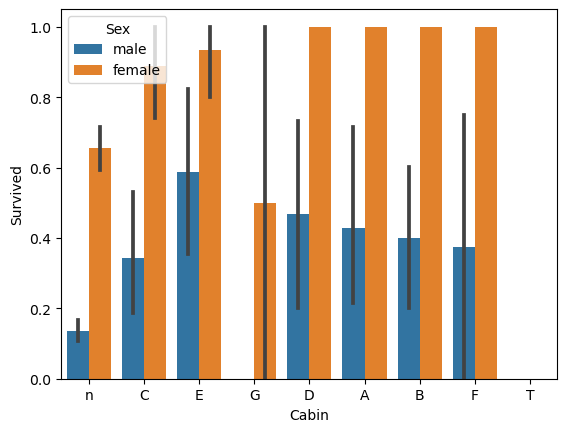

In [7]:
#make a barblot x-Cabin, y-Survived, depending on the Sex feature
sns.barplot(x='Cabin', y='Survived', hue='Sex', data=df)

In [8]:
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare group', ylabel='Survived'>

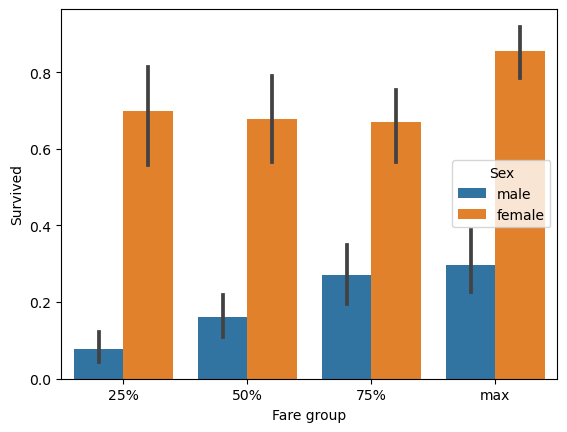

In [11]:
#make a barblot x-Fare, y-Survived, depending on the Sex feature
bins=[0, 7.910400, 14.454200, 31.000000, 512.329200]
labels=['25%', '50%', '75%', 'max']
df['Fare group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
sns.barplot(x='Fare group', y='Survived', hue='Sex', data=df)